<a href="https://colab.research.google.com/github/abdelhedydev/covid-tunisia/blob/master/reg_deaths_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [ ]:
deaths_df = pd.read_csv(data_url)

In [ ]:
deaths_df.shape

(266, 158)

In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546,548,569,581,598,618
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39,42,43,44,44,45
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811,825,837,845,852,861
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8,8,9,9,10,10


In [ ]:
deaths_tunisia = deaths_df.loc[deaths_df['Country/Region']=='Tunisia',deaths_df.columns[4:]]

In [ ]:
deaths_tunisia

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,46,47,47,47,47,48,48,48,48,48,48,48,48,48,48,48,49,49,49,49,49,49,49,49,49,49,49,49,49,49,50,50,50,50,50,50,50


In [ ]:
dates = deaths_tunisia.columns
dates.shape

(154,)

In [ ]:
import numpy as np

In [ ]:
numeros_dates = np.arange(0,len(dates),1)
deaths_nb = deaths_tunisia.to_numpy().reshape(-1)

In [ ]:
df_tunisia = pd.DataFrame({'num_date':numeros_dates,
                           'nombre':deaths_nb},
                           index= dates)

In [ ]:
X = df_tunisia['num_date']
X

1/22/20      0
1/23/20      1
1/24/20      2
1/25/20      3
1/26/20      4
          ... 
6/19/20    149
6/20/20    150
6/21/20    151
6/22/20    152
6/23/20    153
Name: num_date, Length: 154, dtype: int64

In [ ]:
y = df_tunisia.nombre
y

1/22/20     0
1/23/20     0
1/24/20     0
1/25/20     0
1/26/20     0
           ..
6/19/20    50
6/20/20    50
6/21/20    50
6/22/20    50
6/23/20    50
Name: nombre, Length: 154, dtype: int64

Text(0, 0.5, 'Cas morts')

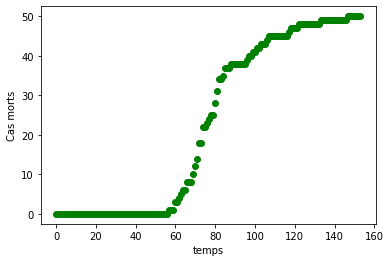

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X,y,'go')
plt.xlabel('temps')
plt.ylabel('Cas morts')

In [ ]:
bins = [0,10,40,70]
y_binned = np.digitize(y,bins)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=42,
                                                 test_size=0.3,
                                                 stratify=y_binned)

In [ ]:
def logistic_model(x,a,b,c):
  return c/(1+np.exp(-(x-b)/a))

In [ ]:
from scipy.optimize import curve_fit
params = curve_fit(logistic_model,X_train,y_train)
a= params[0][0]
b= params[0][1]
c=params[0][2]

In [ ]:
y_test_lin_pres = logistic_model(X_test,a,b,c)
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_test,y_test_lin_pres)

3.446502561088547

In [ ]:
r2_score(y_test,y_test_lin_pres)

0.992325850533887

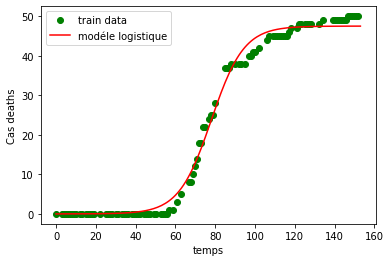

In [ ]:
y_lin_pred = logistic_model(X,a,b,c)
plt.plot(X_train,y_train,'go',label='train data')
plt.plot(X,y_lin_pred,'r-',label='modéle logistique')
plt.xlabel('temps')
plt.ylabel('Cas deaths')
plt.legend()